In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

# You'll generate plots of attention in order to see which parts of an image
# our model focuses on during captioning
import matplotlib.pyplot as plt

# Scikit-learn includes many helpful utilities
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import re
import numpy as np  
import os
import time
import json
from glob import glob
from PIL import Image
import pickle
import cv2
from sklearn.utils import shuffle

print(tf.__version__) 

Found GPU at: 
2.2.0


In [2]:
from IPython.display import clear_output, display
import os.path
from os import path
import shutil
import PIL
from pathlib import Path
from matplotlib import pyplot as plt

In [3]:
from IPython.display import clear_output

In [4]:
def read_label( path):
  f= open( path)
  d= f.read()
  f.close()
  return d 

def write_label( path, text):
  f= open( path, "w")
  f.write( text)
  f.close()

def show( img, name= 'noname'):
  plt.imshow( img)
  plt.title( name)
  plt.show()

def show_gimage( img, name= 'noname'):
  plt.imshow( img, cmap= 'gray')
  plt.title( name)
  plt.show()

def _load_image( path):
  # return cv2.imread( path, cv2.IMREAD_GRAYSCALE)
  return cv2.imread( path)
  
def write_image( path, img):
  cv2.imwrite( path, img)

def resize( img, scale_percent= 60, verbose=False):
  #scale_percent = 60 # percent of original size
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)
  if verbose:
    print( "scale", scale_percent)
    print( "dim", dim)
  # resize image
  return cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 

In [9]:
#
# parte 1 - faz split da imagem original e gera um arquivo para cada jogada
#

count= 3000;
output_folder= "C:/mestrado/datasets/handmade/imagens-originais/all_splitted_rep1"
def split( img):
#     print( img.shape) #esperado (2480, 3504, 3)
    h= 2230+50
    w= 1545+10
    
    img1= img[115:113+h, 145:145+w]
    img2= img[130:130+h, 1860:1860+w]
    
    # esperado 
    return img1, img2

def split_and_save( tag, file):
    global count
    img= cv2.imread( file)
    img= cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    img1, img2= split( img)
    
    fname= os.path.join( output_folder, "9999_"+str(count).zfill(4)+"_L_"+ tag+"_"+ Path( file).name)
    count+= 1
    write_image( fname, img1)
    fname= os.path.join( output_folder, "9999_"+str(count).zfill(4)+"_R_"+ tag+"_"+ Path( file).name)
    count+= 1
    write_image( fname, img2)
    if( count%100== 0 or count%100== 1):
        print( count, "...")
    
for tag,folder in [
    ("part3", "C:/mestrado/datasets/handmade/imagens-originais/scanned_images-part3-rep2")]:
    
    files= glob( os.path.join( folder, "*.jpg"))
    for f in files:
        split_and_save( tag, f)

In [5]:
import time

In [6]:
import shutil

In [26]:
from shutil import copyfile

In [ ]:
#
# passo 3.1 - limipar fullpage
#

In [7]:
orig_imgdir= 'C:/mestrado/datasets/carnaval/carnaval_fullpage_clean_for_final/images_before_slice'
dest_imgdir= 'C:/mestrado/datasets/carnaval/carnaval_fullpage_clean_for_final/images'
files= glob( os.path.join( orig_imgdir, "*.jpg"))

In [8]:
len( files)

621

In [10]:
#
# final step - trim the images
#
def showsmall( img, name= 'noname'):
    plt.figure(figsize = (4,6))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
    
    
def crop_only( img, y, h, x, w):
    crop_img= img[ y:y+h, x:x+w]
    return crop_img


w= 335 
# w= 310 

count= 1
for f in files:
    # trim
#     clear_output()
    if count%50== 0:
        print( count)
    count+= 1
    
#     clear_output()
    img= cv2.imread( f)
#     show( img)

#     img1= img[504:,:]
    img2= np.concatenate((
        img[:, 3:(3+w)],
        img[:, 435:(435+w)],
        img[:, 772:(772+w)],
        img[:, 1200:(1200+w)]
    ), axis= 1)
#     showsmall( img[:, 5:(5+w)])
#     showsmall( img[:, 435:(435+w)])
#     showsmall( img[:, 772:(772+w)])
#     showsmall( img[:, 1200:(1200+w)])
    

#     m= input()    
    img3= cv2.resize(img2, (678, 900), interpolation = cv2.INTER_AREA)  
    write_image( os.path.join( dest_imgdir, Path( f).name), img3)


50
100
150
200
250
300
350
400
450
500
550
600


In [25]:
print( 1)

1


prev C:/mestrado/datasets/carnaval/carnaval_fullpage_clean_for_final/images\carnaval_0676_fullpage.jpg
----------------
1 186 C:/mestrado/datasets/carnaval/carnaval_fullpage_clean_for_final/images\carnaval_0677_fullpage.jpg


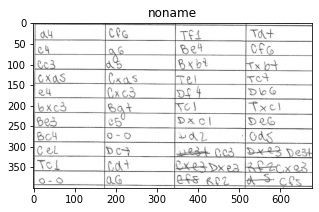

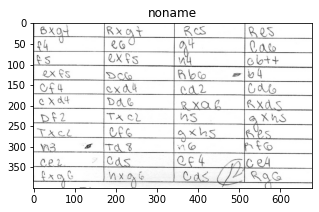

In [17]:
#
# Corrigir as imagens deslocadas
#
#
# pass 3.2 limpar os que estao com a parte inferir cortado
#
def showbig( img, name= 'noname'):
    plt.figure(figsize = (5,4))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
    
def showsmall( img, name= 'noname'):
    plt.figure(figsize = (2,2))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
    
original_folder= "C:/mestrado/datasets/carnaval/carnaval_fullpage_clean_for_final/images_before_slice/"
images_folder= "C:/mestrado/datasets/carnaval/carnaval_fullpage_clean_for_final/images"
files= glob( os.path.join( images_folder, "*.jpg"))
k= len( files)
kk= 0
m= None
hold= None
_f= None
_lab= None
for f in files:
    clear_output()
    print( 'prev', _f)
    if hold:
        print( "MOVIDO PARA -HOLD =>", Path(hold).name)
        
    img= cv2.imread( f)
    print( '----------------')
    print( k, kk, f)
    k-= 1
    kk+= 1

    showbig( img[0:400:,:])
    showbig( img[(img.shape[0]-400):img.shape[0],:])

    m= input()
    _f= f
    hold= None
    if m is None or len( m)<= 0:
        pass
    elif m=='x':
        print( 'bye!')
        break
    else:
        hold= f
        print( "move original para hold")
        shutil.move( 
            os.path.join( original_folder, Path(f).name), 
            os.path.join( original_folder, '_hold'))
        shutil.move( 
            f, 
            os.path.join( images_folder, '_hold'))

prev C:/mestrado/datasets/carnaval/carnaval_fullpage_clean_for_final/images\carnaval_0676_fullpage.jpg
----------------
1 165 C:/mestrado/datasets/carnaval/carnaval_fullpage_clean_for_final/images\carnaval_0677_fullpage.jpg
size= 28
['d4', 'Nf6']


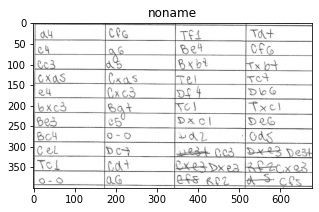

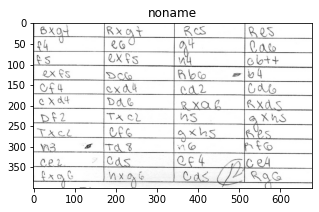

[]
0
move original para hold


In [22]:
#
# Conferir labels
#
#
# pass 3.2 limpar os que estao com a parte inferir cortado
#
def showbig( img, name= 'noname'):
    plt.figure(figsize = (5,4))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
    
def showsmall( img, name= 'noname'):
    plt.figure(figsize = (2,2))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
    
def get_tokens( label):
    token= label.split()
    print( 'size=', len(token))
    top= []
    bot= []
    for p in [0,1,50,51]:
        if len( token)> p:
            top.append( token[p])
    for p in [48,49,98,99]:
        if len( token)> p:
            bot.append( token[p])
    return top, bot
    
labels_dir= "C:/mestrado/datasets/carnaval/carnaval_fullpage_clean_for_final/labels" 
original_folder= "C:/mestrado/datasets/carnaval/carnaval_fullpage_clean_for_final/images_before_slice/"
images_folder= "C:/mestrado/datasets/carnaval/carnaval_fullpage_clean_for_final/images"
files= glob( os.path.join( images_folder, "*.jpg"))
k= len( files)
kk= 0
m= None
hold= None
_f= None
_lab= None
for f in files:
    clear_output()
    print( 'prev', _f)
    if hold:
        print( "MOVIDO PARA -HOLD =>", Path(hold).name)
        
    img= cv2.imread( f)
    label= read_label( os.path.join( labels_dir, Path(f).name.replace( '.jpg', '.pgn')))
    print( '----------------')
    print( k, kk, f)
    k-= 1
    kk+= 1

    top, bot= get_tokens( label)
    print( top)
    showbig( img[0:400:,:])
    showbig( img[(img.shape[0]-400):img.shape[0],:])
    print( bot)

    m= input()
    _f= f
    hold= None
    if m is None or len( m)<= 0:
        pass
    elif m=='x':
        print( 'bye!')
        break
    else:
        hold= f
        print( "move original para hold")
        shutil.move( 
            os.path.join( original_folder, Path(f).name), 
            os.path.join( original_folder, '_hold'))
        
        shutil.move( 
            f, 
            os.path.join( images_folder, '_hold'))

In [28]:
root_dir= "C:/mestrado/datasets/carnaval/carnaval_fullpage_clean_for_final";
imagedir= os.path.join(root_dir, 'images')
labelsdir= os.path.join(root_dir, 'labels')
files= glob( os.path.join( images_folder, "*.jpg"))
print( 'copiando ', len(files))
for f in files:
    copyfile( f, os.path.join("C:/mestrado/datasets/unified/dataset/carnaval/images", Path(f).name))
    copyfile( os.path.join( labelsdir, Path(f).name.replace( '.jpg', '.pgn')), 
              os.path.join("C:/mestrado/datasets/unified/dataset/carnaval/labels", Path(f).name.replace( '.jpg', '.pgn')))


copiando  133
